In [1]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image

from PIL import ImageOps

import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, precision_score


import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D



import warnings
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization

# Time
import time
import datetime


from sklearn.metrics import accuracy_score
from keras.models import load_model
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Train.csv')

df_test = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Test.csv')

meta = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Meta.csv')



print("Training dataset:")

print(df.head())



print("\nTest dataset:")

print(df_test.head())



print("\nMeta dataset:")

print(meta.head())

Training dataset:
   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png  

Test dataset:
   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0     53      54       6       5      48      49       16  Test/00000.png
1     42      45       5       5      36      40        1  Test/00001.png
2     48      52       6       6      43      47       38  Test/00002.png
3     27      29       5       5      22      24       33  Test/00003.png
4     60      

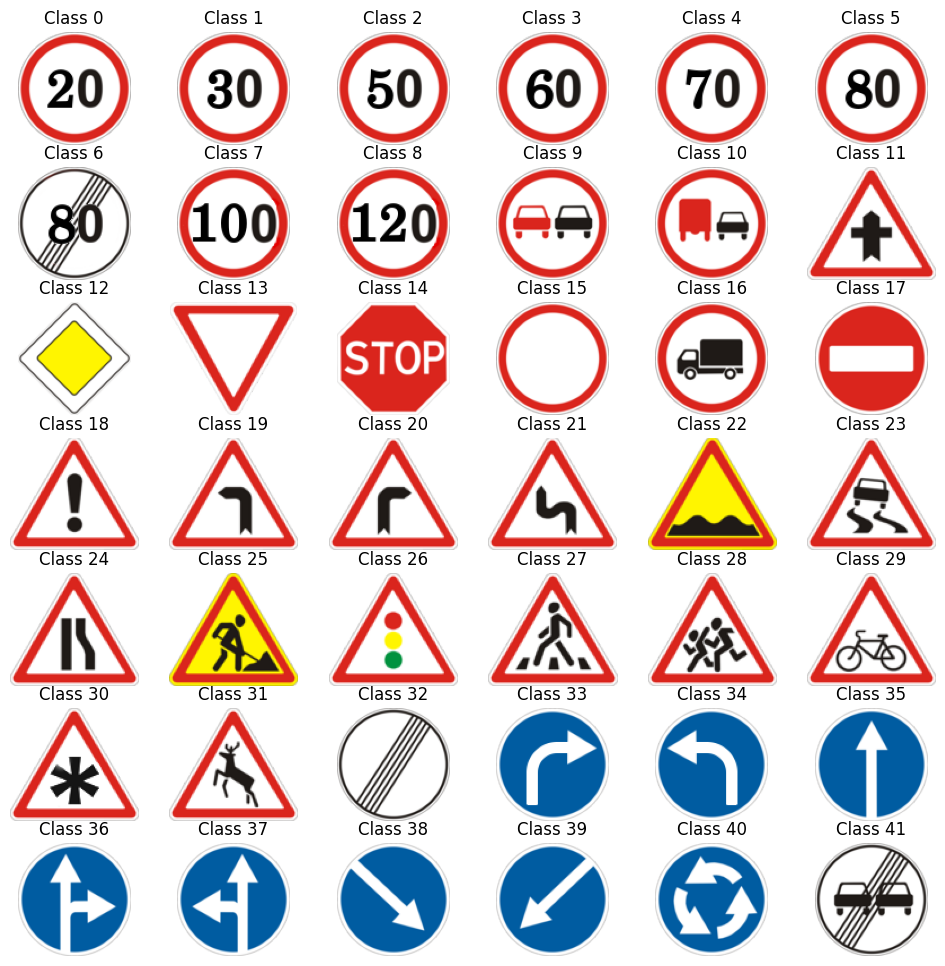

In [ ]:
meta_sorted = meta.sort_values(by="ClassId").reset_index(drop=True)
dataset_path='/kaggle/input/gtsrb-german-traffic-sign/'


fig, axs = plt.subplots(7, 6, figsize=(12, 12))

for i in range(42):

    img_path = os.path.join(dataset_path, meta_sorted.iloc[i]["Path"])

    img = Image.open(img_path)

    axs[i // 6, i % 6].imshow(img)

    axs[i // 6, i % 6].axis("off")

    axs[i // 6, i % 6].set_title("Class {}".format(str(meta_sorted.iloc[i]["ClassId"])))
plt.savefig('1.jpg')
plt.show()


<Figure size 640x480 with 0 Axes>

In [ ]:
current_working_directory='/kaggle/input/gtsrb-german-traffic-sign/'
number_of_classes = 43
Data = []

Labels = []
for i in tqdm(range(number_of_classes)):
    path = os.path.join(current_working_directory,'Train',str(i))
    images = os.listdir(path)
    for j in images:
        try:
            image = Image.open(path + '/'+ j)
            image = image.resize((32,32))
            image = np.array(image)
            image = image / 255.0
            Data.append(image)
            Labels.append(i)
        except Exception as e:
            print(e)

100%|██████████| 43/43 [04:29<00:00,  6.28s/it]


<Axes: >

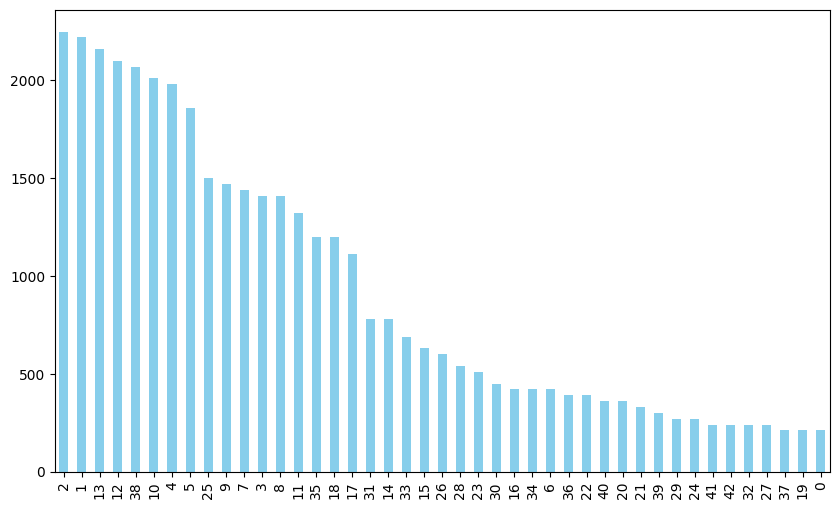

In [ ]:
a=pd.Series(Labels).value_counts()
plt.figure(figsize=(10, 6))  # Set the figure size
a.plot(kind='bar', color='skyblue')

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(np.array(Data), Labels, test_size=0.2, random_state=42)

# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [ ]:
X_train.shape

(31367, 32, 32, 3)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.15))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.20))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(43, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,542,443 (9.70 MB)

 Trainable params: 2,542,443 (9.70 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

# Build a simple model (you can use any model here)


# Visualize the model architecture and save as an image
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
with tf.device('/GPU:0'):
    epochs = 5
    history1 = model.fit(X_train, y_train, batch_size=128, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/5
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9962 - loss: 0.0127 - val_accuracy: 0.9960 - val_loss: 0.0218
Epoch 2/5
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9965 - loss: 0.0100 - val_accuracy: 0.9948 - val_loss: 0.0235
Epoch 3/5
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9965 - loss: 0.0117 - val_accuracy: 0.9950 - val_loss: 0.0204
Epoch 4/5
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9977 - loss: 0.0074 - val_accuracy: 0.9929 - val_loss: 0.0261
Epoch 5/5
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9965 - loss: 0.0124 - val_accuracy: 0.9954 - val_loss: 0.0269


In [ ]:
X_train.shape

(31367, 32, 32, 3)

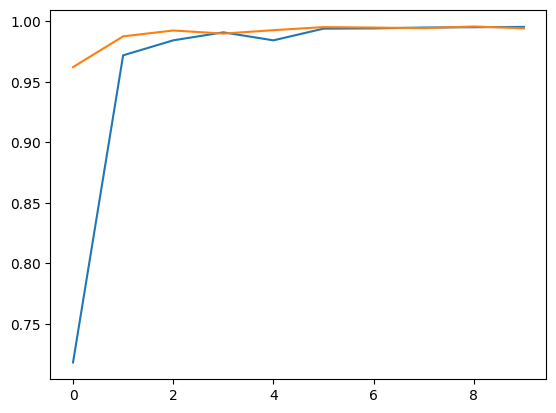

In [ ]:
# history1.history['accuracy']
plt.plot(list(range(0,10)),history1.history['accuracy'])
plt.plot(list(range(0,10)),history1.history['val_accuracy'])
plt.show()

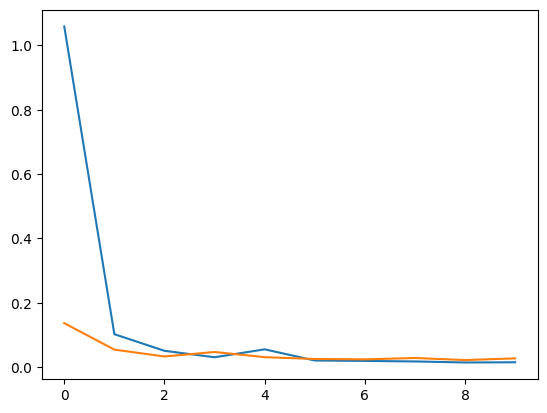

In [ ]:
plt.plot(list(range(0,10)),history1.history['loss'])
plt.plot(list(range(0,10)),history1.history['val_loss'])
plt.show()

246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


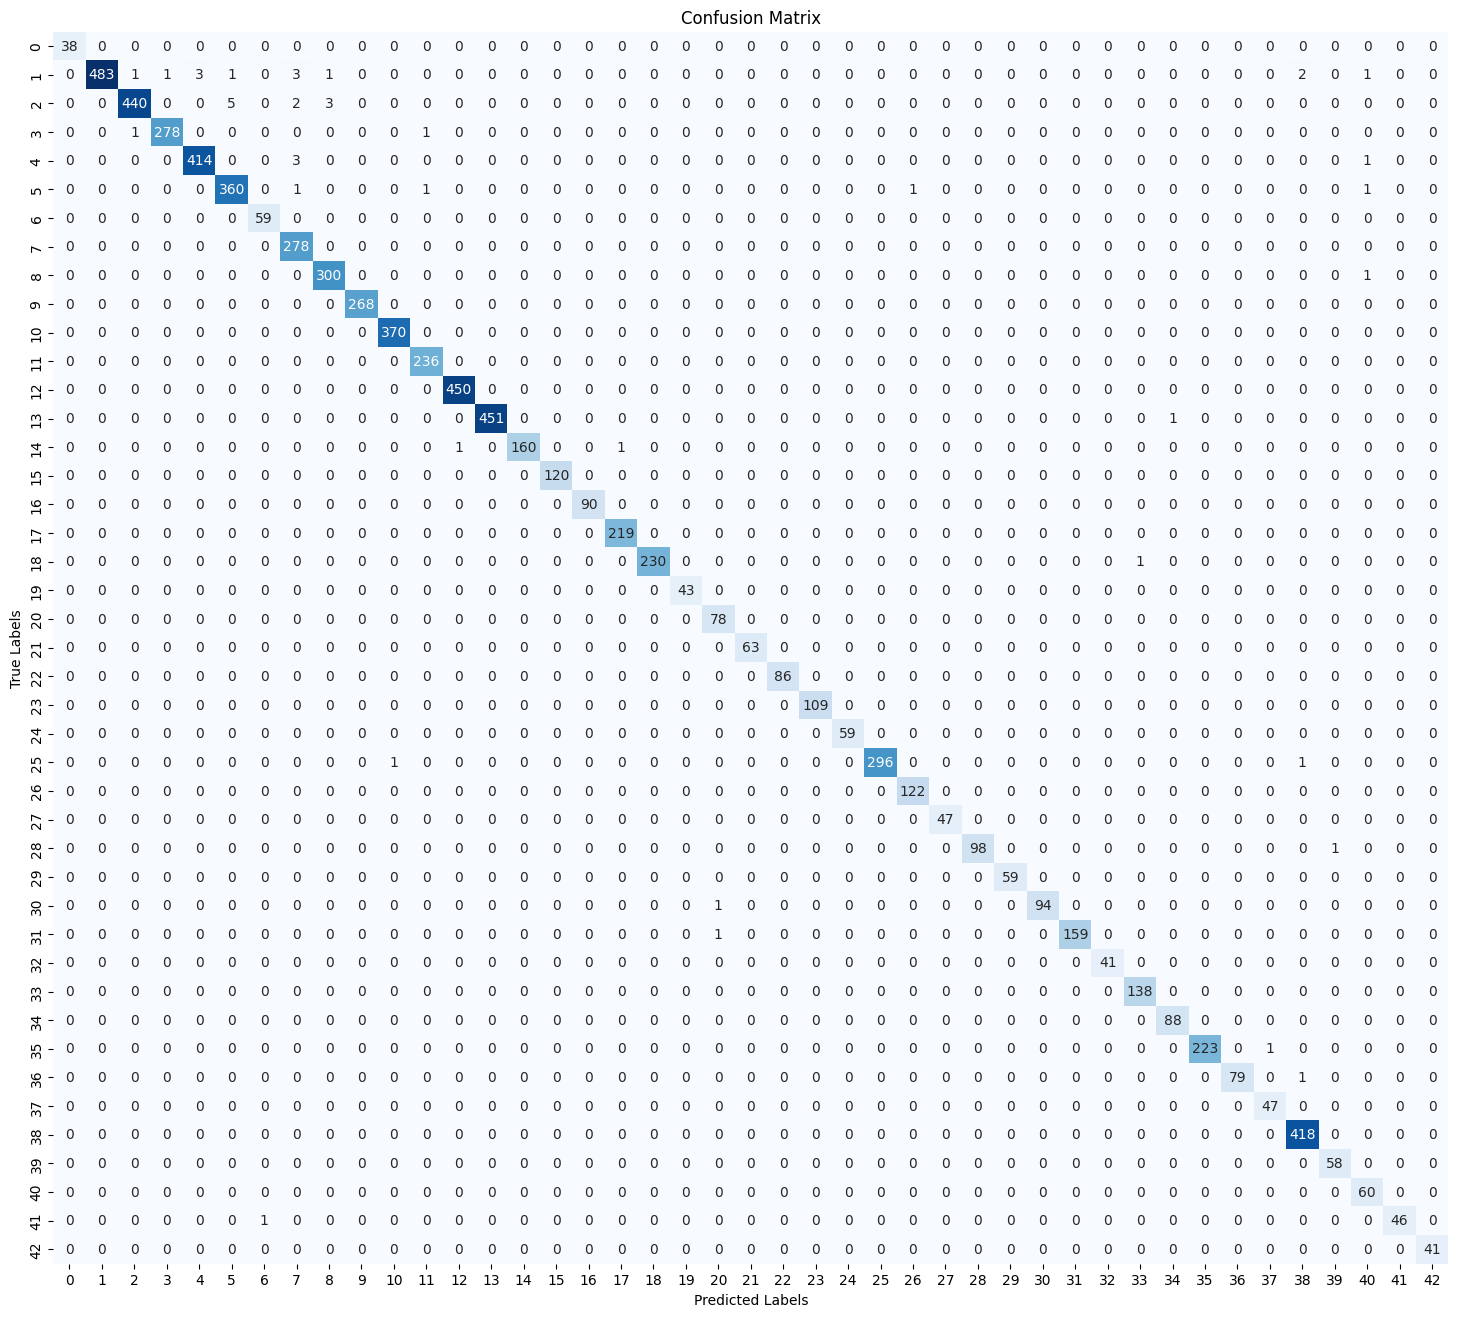

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_test1=np.argmax(y_test,axis=1)
cm = confusion_matrix(y_test1, y_pred)
plt.figure(figsize=(18,16))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False )
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis = -1)
y_test1=np.argmax(y_test,axis=1)
# Accuracy, Precision and F1 score with the test data
print("Accuracy Score:", accuracy_score(y_test1, pred))
print("Precision Score:", precision_score(y_test1, pred, average = 'macro'))

print("F1 Score:", f1_score(y_test1, pred, average = 'macro'))

# Confusion Matrix
print("\nConfusion Matrix\n")
confMatrix = confusion_matrix(y_test1, pred)
print(confMatrix, "\n")

# Comprehensive Classification Report
print("Classification Report\n")
print(classification_report(y_test1, pred))

246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy Score: 0.9941341494516704
Precision Score: 0.993672948411175
F1 Score: 0.9948031868690158

Confusion Matrix

[[ 38   0   0 ...   0   0   0]
 [  0 483   1 ...   1   0   0]
 [  0   0 440 ...   0   0   0]
 ...
 [  0   0   0 ...  60   0   0]
 [  0   0   0 ...   0  46   0]
 [  0   0   0 ...   0   0  41]] 

Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      0.97      0.99       496
           2       1.00      0.98      0.99       450
           3       1.00      0.99      0.99       280
           4       0.99      0.99      0.99       418
           5       0.98      0.99      0.99       364
           6       0.98      1.00      0.99        59
           7       0.97      1.00      0.98       278
           8       0.99      1.00      0.99       301
           9       1.00      1.00      1.00       268
          10       1.00      

In [ ]:
from glob import glob

In [ ]:
current_working_directory='/kaggle/input/test-image/'

Data1 = []

Labels1 = []
add=glob("/kaggle/input/test-image/*")
for j in add:
    try:
        image = Image.open(j)
        image = image.resize((32,32))
        image = np.array(image)
        image = image / 255.0
        image= image[:,:,0:3]
        Data1.append(image)

    except Exception as e:
        print(e)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
11


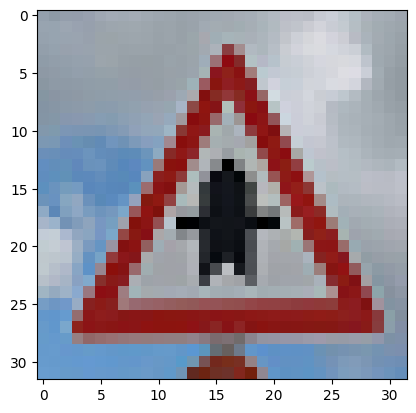

25


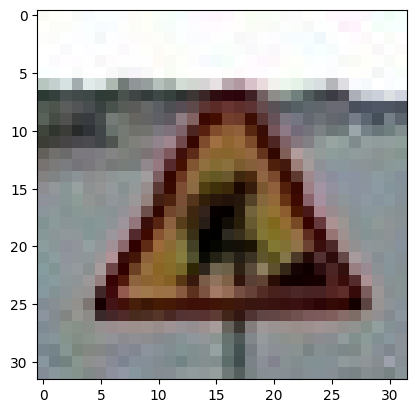

17


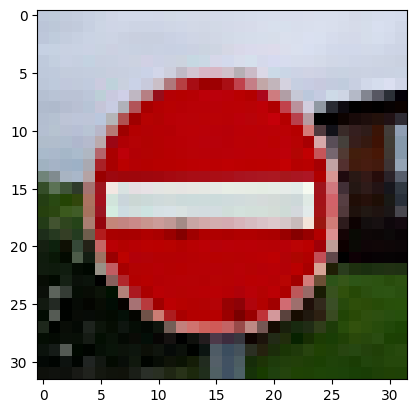

12


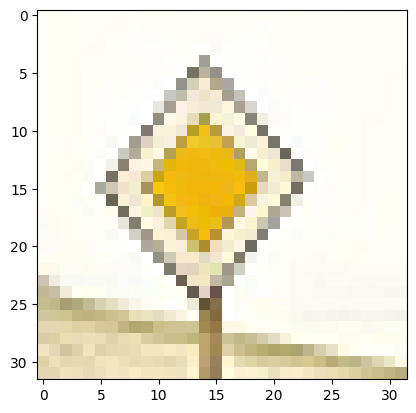

13


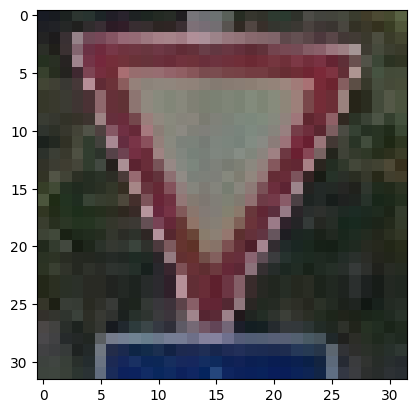

35


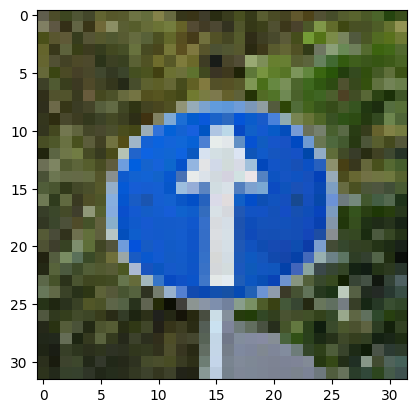

38


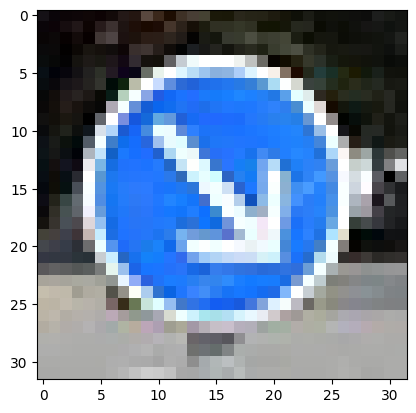

14


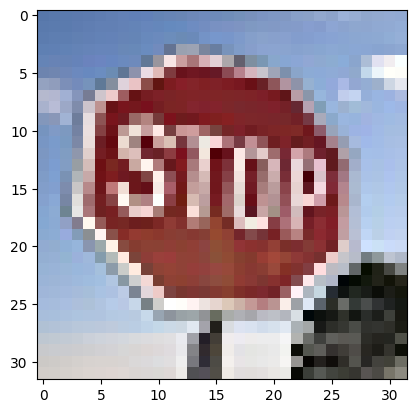

33


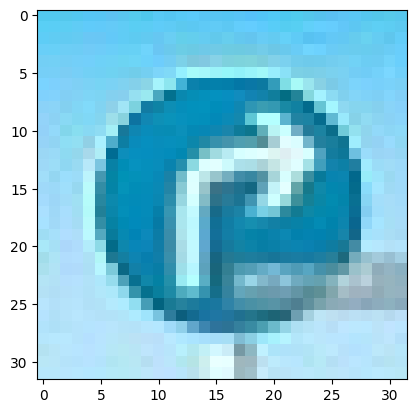

4


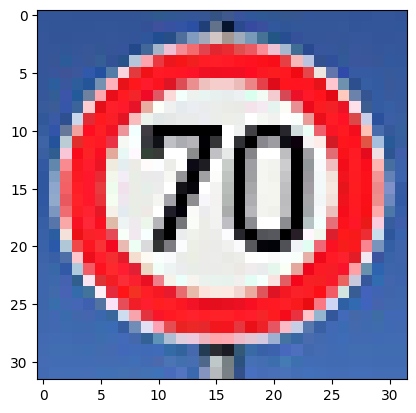

In [ ]:
with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(np.array(Data1)), axis = -1)
for i in range(0,10):
    print(pred[i])
    plt.imshow(Image.open(add[i]))
    plt.show()

In [4]:
import pickle
with open('/content/train.p', 'rb') as file:
  loaded_data = pickle.load(file)

In [10]:
loaded_data['labels'].shape

(34799,)